In [1]:
from google.colab import files
files.upload()

Saving K-NEarest-Neighbor-master.zip to K-NEarest-Neighbor-master.zip


{'K-NEarest-Neighbor-master.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\xba6LN\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1a\x00\t\x00K-NEarest-Neighbor-master/UT\x05\x00\x01\x01\xdeb\\PK\x03\x04\n\x00\x00\x00\x08\x00\xba6LN\x04\xe6(\xed$`\x00\x00\xa8\xb2\x00\x00B\x00\t\x00K-NEarest-Neighbor-master/01-K Nearest Neighbors with Python.ipynbUT\x05\x00\x01\x01\xdeb\\\xec\xbcy\xb3\xabH\x92/\xf8\x7f\x7f\n\xbd|6V\xd5FV\xb2o=\x9dm\x86\x84\x04B\x80\x90\x00\x81\xa8S\x96\xc6*\xb1\xefbi{\xdf}\x02\xe9\xde\x9b\xdb\xcds\xaa^f\xce\xd8\xd8\xccI;\xf7\xa0 \x88\xf0\x08w\xff\xf9\xcf=P\xfe\xf7\xbf\xad\xbe\xf1\xc3,k\xbf\xf9\x8f\xd5\xdf\xffm\xb5\xfao\xf0\xfbj\xf9\xa1\x9b\xaa\x10\xb4~\x93\xbbM\x1a\x94C\xf1\xcd\xb7\xcf{y\xd8\xb9\x81\xdb\xb9\xe0\xd6\x7f\xff\xafWS[\xf6\x8d\xbf\xf4\xfd\xfb?\xc0\xe7g\xe3\xef\x1cg\xf9\xb8\xfa\xe6\x7f\xae\x0e+5t\x9b\xb0\xed\xc0\xdf\xf8v\xf7\xca\xa6]\rqw_iSw/\x8b\xb7O\x83\xad\xbe\xf9\xf1\xeaZ\xf6\x7fy\x84+/\x0c\x8b\xd5-~\x80\x7f\xdd\x95\x9f\xb9m\x1bGq\x18\xac\x96)Wm\xd8\xad\xa2\xa6

In [2]:
from zipfile import ZipFile
filename='/content/K-NEarest-Neighbor-master.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/K-NEarest-Neighbor-master/Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
feat_sel = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
df_sel = pd.DataFrame(feat_sel, columns=df.columns[:-1])
df_sel.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_sel, df['TARGET CLASS'], test_size=0.3)

In [16]:
X_train.shape

(700, 10)

In [17]:
X_test.shape

(300, 10)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [21]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
pre = KNN.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, pre))

[[149  17]
 [  6 128]]


In [26]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       166
           1       0.88      0.96      0.92       134

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [27]:
error_rate = []

for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train, y_train)
  pre_i = KNN.predict(X_test)
  error_rate.append(np.mean(pre_i != y_test))

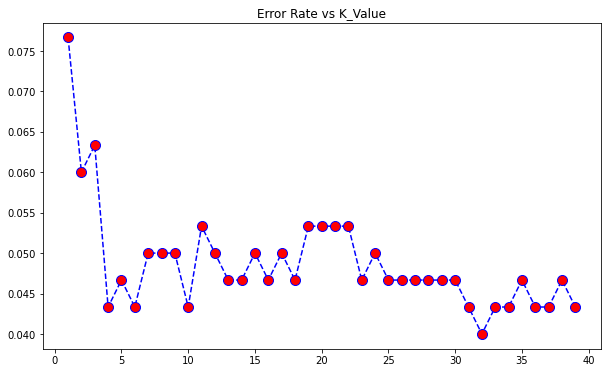

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K_Value')
plt.x_label=('K')
plt.y_label=('Error_rate')
plt.show()

In [32]:
KNN = KNeighborsClassifier(n_neighbors=32)
KNN.fit(X_train, y_train)
pre_i = KNN.predict(X_test)

In [33]:
print(classification_report(pre_i, y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       156
           1       0.99      0.92      0.96       144

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

